1. A) The Atbash cipher is an encryption method in which each letter of a word is replaced with its "mirror" letter in the alphabet: A <=> Z; B <=> Y; C <=> X; etc.

Create a function that takes a string and applies the Atbash cipher to it.


In [52]:
def cipher(s):
    return "".join(
                chr(155 - ord(c)) if 65 <= ord(c) <= 90
                else chr(219 - ord(c))
             for c in s)

s = input("Enter string : ").upper()

print(f"cipher string : {cipher(s)}")

Enter string : abcD
cipher string : ZYXW


B) An identity matrix is defined as a square matrix with 1s running from the top left of the square to the bottom right. The rest are 0s. The identity matrix has applications ranging from machine learning to the general theory of relativity.

Create a function that takes an integer n and returns the identity matrix of n x n dimensions. For this challenge, if the integer is negative, return the mirror image of the identity matrix of n x n dimensions.. It does not matter if the mirror image is left-right or top-bottom.


In [2]:
import numpy as np


def identity(n):
    mirror = n < 0 
    n = abs(n)

    m = np.matrix([
            [1 if i == j else 0 for j in range(n)] for i in range(n)
        ])


    return m if not mirror else m[::-1]

if __name__ == "__main__":
    n = int(input("Enter order of matrix : "))
    print(identity(n))

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


2 a) Create a function that will recursively count the number of digits of a number. Conversion of the number to a string is not allowed, thus, the approach is recursive.
Example
digits_count(4666) ➞ 4
digits_count(544) ➞ 3


In [ ]:
def digit_count(n):
    return 1 if n < 10 else digit_count(int(n / 10)) + 1

n = int(input("Enter number : "))
print(f"no of digits : {digit_count(n)}")

B) A prison can be represented as a list of cells. Each cell contains exactly one prisoner. A 1 represents an unlocked cell and a 0 represents a locked cell.
[1, 1, 0, 0, 0, 1, 0]
Starting inside the leftmost cell, you are tasked with seeing how many prisoners you can set free, with a catch. You are the prisoner in the first cell. If the first cell is locked, you cannot free anyone. Each time you free a prisoner, the locked cells become unlocked, and the unlocked cells become locked again.
Create a function that, given this unique prison arrangement, returns the number of freed prisoners.
freed_prisoners([1, 1, 0, 0, 0, 1, 0]) ➞ 4

freed_prisoners([1, 1, 1]) ➞ 1

freed_prisoners([0, 0, 0]) ➞ 0

freed_prisoners([0, 1, 1, 1]) ➞ 0
Hint:
1. You are the prisoner in the first cell. You must be freed to free anyone else. 
2. You must free a prisoner in order for the locks to switch. So in the second example where the input is [1, 1, 1] after you release the first prisoner, the locks change to [0, 0, 0]. Since all cells are locked, you can release no more prisoners.


1, 1, 0, 0, 0, 1, 0
0, 0, 1, 1, 1, 0, 1

0, 1, 1, 0, 0, 1, 1

In [13]:
def freed_prisioners(a):
    if a[0] == 0:
        return 0

    b = [0 if i == 1 else 1 for i in a]
    n = len(a)

    re = 1
    for i in range(1, n):
        if b[i] == 1:
            re += 1
            a, b = b, a
    return re

arr = list(map(int, input().split()))
print(f"Freed Prisioners : {freed_prisioners(arr)}")

Freed Prisioners : 4


3.  Use the following url for downloading csv file
https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv 




A) Read Total profit of all months and show it using a line plot

In [8]:
import pandas as pd
import requests
from codecs import decode
import matplotlib.pyplot as plt
import numpy as np

In [13]:
url = 'https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv'
r = requests.get(url)

header, *rows = r.iter_lines()

header = list(decode(header).split(','))
text = [list(map(int, decode(row).split(','))) for row in rows]

df = pd.DataFrame(text, columns = header)
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


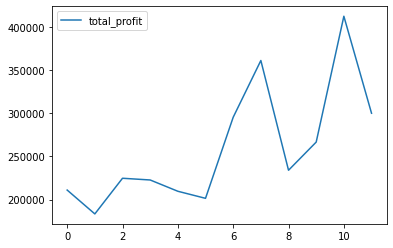

In [4]:
df.plot(y = 'total_profit')
plt.show()

B) Read face cream and facewash product sales data and show it using the bar chart


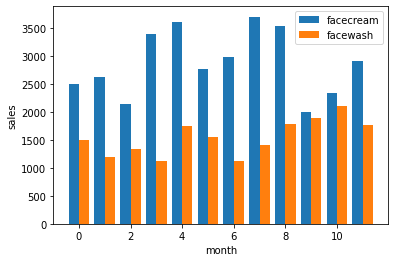

In [11]:
x = df['month_number']
y = df['facecream']
z = df['facewash']
X = np.arange(len(x))
plt.bar(X - 0.2, y, 0.4, label="facecream")
plt.bar(X + 0.2, z, 0.4, label="facewash")
plt.xlabel("month")
plt.ylabel("sales")
plt.legend()
plt.show()

5)  a) Calculate total sale data for last year for each product and show it using a Pie chart

In [32]:
products = df.drop(['month_number', 'total_units', 'total_profit'], axis = 1)

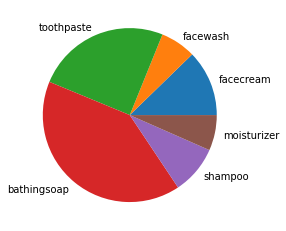

In [36]:
plt.pie(products.sum(), labels = products.columns)
plt.show()

5) b)Read Bathing soap facewash of all months and display it using the Subplot


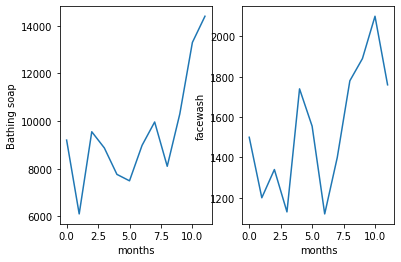

In [49]:
plt.subplot(1, 2, 1)
plt.plot(range(12), df['bathingsoap'])
plt.xlabel("months")
plt.ylabel("Bathing soap")

plt.subplot(1, 2, 2)
plt.plot(range(12), df['facewash'])
plt.xlabel("months")
plt.ylabel("facewash")

plt.show()